### Market segmentation example

#### Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.cluster import KMeans

#### Load the data

In [2]:
data = pd.read_csv('3.12.Example.csv')

In [3]:
data

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


#### Plot the data

Text(0, 0.5, 'Loyalty')

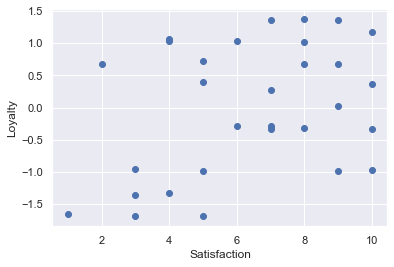

In [4]:
plt.scatter(data['Satisfaction'], data['Loyalty'])
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

#### Select the features

In [5]:
x = data.copy()

#### Clustering

In [6]:
kmeans = KMeans(2)
kmeans.fit(x)

KMeans(n_clusters=2)

#### Clustering results

In [7]:
clusters = x.copy()
clusters['cluster_pred'] = kmeans.fit_predict(x)

Whenever we cluster on the basis of a single feature, the results looks like this graph

Text(0, 0.5, 'Loyalty')

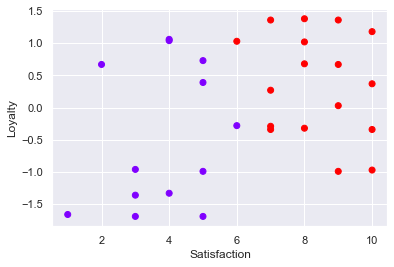

In [8]:
plt.scatter(clusters['Satisfaction'], clusters['Loyalty'], c=clusters['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

How can we give both variables equal weight to solve this issue?

#### Standardize the variables

In [9]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(x) # this method standardizes with mean 0, and standard deviation of 1 by default, each variable separately
x_scaled # x_scaled contains the standardized 'Satisfaction' and the same values for 'Loyalty'

array([[-0.93138063, -1.3318111 ],
       [-0.15523011, -0.28117124],
       [-0.54330537, -0.99160391],
       [ 0.23284516, -0.29117733],
       [-0.93138063,  1.05964534],
       [-2.09560642, -1.6620122 ],
       [ 1.39707095, -0.97159172],
       [ 0.62092042, -0.32119561],
       [ 0.62092042,  1.01962097],
       [ 0.62092042,  0.67941378],
       [ 1.39707095, -0.3412078 ],
       [-0.54330537,  0.38923705],
       [-0.54330537, -1.69203048],
       [-1.70753116,  0.66940768],
       [ 0.23284516,  0.26916393],
       [ 1.00899568,  1.35982816],
       [ 0.62092042,  1.37984035],
       [ 0.23284516,  1.35982816],
       [ 0.23284516, -0.3412078 ],
       [ 1.00899568,  0.66940768],
       [ 1.39707095,  1.17971847],
       [-1.31945589, -1.69203048],
       [-0.93138063,  1.03963316],
       [-1.31945589, -0.96158562],
       [-0.15523011,  1.02962706],
       [ 1.00899568, -0.99160391],
       [ 1.39707095,  0.36922486],
       [ 1.00899568,  0.02901767],
       [-1.31945589,

#### Take advantage of the Elbow method

In [10]:
wcss=[]

for i in range(1,10):
    kmeans = KMeans(i)
    kmeans.fit(x_scaled)
    wcss.append(kmeans.inertia_)

wcss

[60.0,
 29.818973034723147,
 17.913349527387965,
 10.24718180592842,
 7.792695153937187,
 6.569489487091783,
 5.348079410290979,
 4.352037765292862,
 3.752355196324647]

Text(0, 0.5, 'WCSS')

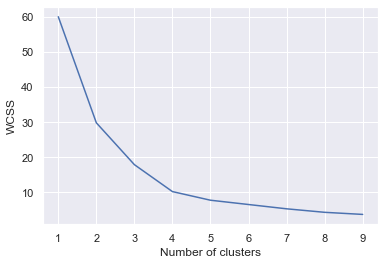

In [11]:
plt.plot(range(1,10),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

#### Explore clustering solutions and select the number of clusters

In [12]:
kmeans_new = KMeans(2)
kmeans_new.fit(x_scaled)
clusters_new = x.copy() # Original values
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled) # standardized data

In [13]:
clusters_new

,Satisfaction,Loyalty,cluster_pred
0,4,-1.33,1
1,6,-0.28,0
2,5,-0.99,1
3,7,-0.29,0
4,4,1.06,0
5,1,-1.66,1
6,10,-0.97,0
7,8,-0.32,0
8,8,1.02,0
9,8,0.68,0


We will plot the data without standardizing the Axes, but the solution will be the standardized one

Text(0, 0.5, 'Loyalty')

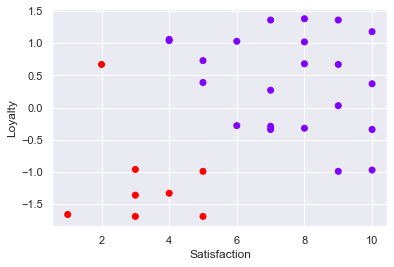

In [14]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

In unsupervised learning, the algorithm will do the magic but we need to interpret the result

red cluster: Alienated (dissatisfied and un loyal)

purple cluster: The everything else cluster (so heterogenous)

In [22]:
kmeans_new = KMeans(3)
kmeans_new.fit(x_scaled)
clusters_new = x.copy() # Original values
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled) # standardized data

Text(0, 0.5, 'Loyalty')

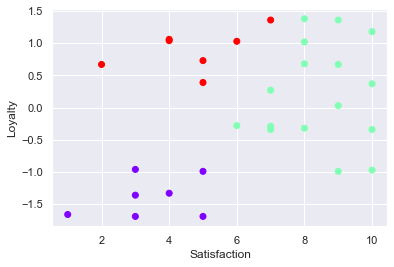

In [23]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

left bottom cluster: Alienated

left top cluster: Supporters

right cluster: 'All that's left' (we can not really name it, still too much mix)

In [26]:
kmeans_new = KMeans(4)
kmeans_new.fit(x_scaled)
clusters_new = x.copy() # Original values
clusters_new['cluster_pred'] = kmeans_new.fit_predict(x_scaled) # standardized data

Text(0, 0.5, 'Loyalty')

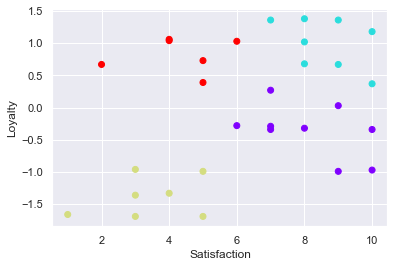

In [27]:
plt.scatter(clusters_new['Satisfaction'], clusters_new['Loyalty'], c=clusters_new['cluster_pred'], cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')

left down cluster: Alienated

left up cluster: Supporters

right top cluster: Fans (our favorite, eventually we hope that all points on the graph will turn into 'Fans')

right bottom cluster: Roamers (satisfied but not loyal)

A 5 cluster solution, spilt the Roamers into two groups, what is actually not very meaningful to our analysis, does not add value to it.

The 4 cluster solution seems to be the best one, which one you use depends on the problem at hand!.